In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.stats as st
import time

In [19]:
max_20_b=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/max_cen_b.csv')
max_20_m=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/max_cen_m.csv')
max_20_e=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/max_cen_e.csv')
#########################
_tvels = 'центральных';
bad_state = 20;
#########################
len(max_20_b)
states = 100;

In [3]:
max_20_b = max_20_b.query('kq > 1.1 | state == 0')
max_20_m = max_20_m.query('kq > 1.1 | state == 0')
max_20_e = max_20_e.query('kq > 1.1 | state == 0')
len(max_20_b)

57900

In [15]:
def PlotSeries(_name,legend_prefix,df1,_tvel_type):
    plt.figure(figsize=(12,10));
    bind=np.arange(min(df1),max(df1),step=1);
    print(max(df1));
    plt.grid(True);
    plt.xlabel('Всплески энерговыделения, %', fontsize=20);
    plt.ylabel('Частота', fontsize=20);
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    percent=95
    quant = st.scoreatpercentile(df1,percent)
    plt.hist(df1,bind,label='{}, {}(95%)={:.2f}'.format(legend_prefix,_name,quant),alpha=0.75, color='blue');    
    plt.vlines(quant,0,15,color='red')
    plt.legend(fontsize=20);
    plt.title(('Отклонение в энерговыделении {} твэлов').format(_tvel_type),fontsize=20);
    plt.show();

In [20]:
def GetMaxFromState(arr):
    max_val_kk = [];
    max_val_kr = [];
    for i in range(0,states):
        if (i == bad_state):
            continue;
        _state = arr.query('state == @i');
        _max_kq = _state.sort_values('kq').tail(120);
        _max_ = _max_kq.sort_values('kr').tail(1);
       # print(_max_);
        _max_.index = {0};
        max_val_kk.append(_max_.at[0,'dkk'])
        max_val_kr.append(_max_.at[0,'dkr'])
    return max_val_kk, max_val_kr;

In [6]:
def CaclulateDev(arr):
    dkr = [];
    dkq = [];
    dkk = [];
    nominal = arr.query('state == 0');
    for i in range(0,states):
        if ((i % 10) == 0):
            print('state {}'.format(i));
        state_arr = arr.query('state == @i');
      #  print(state_arr.index)
        for j in state_arr.index:
            try:
                _tvs =  state_arr.at[j, 'tvs'];
                _kq =   state_arr.at[j, 'kq'];
                _kk =   state_arr.at[j, 'kk'];
                _kr =   state_arr.at[j, 'kr'];
                _tvel = state_arr.at[j, 'tvel'];
                mini_norm_df = nominal.query('tvs == @_tvs & tvel == @_tvel');
                ix = mini_norm_df.index.tolist();
                _kk_n = mini_norm_df.at[ix[0],'kk'];
                _kq_n = mini_norm_df.at[ix[0],'kq'];
                _kr_n = mini_norm_df.at[ix[0],'kr'];
                dkk.append((100*(_kk - _kk_n) / _kk_n));
                dkq.append((100*(_kq - _kq_n) / _kq_n));
                dkr.append((100*(_kr - _kr_n) / _kr_n));
            except IndexError:
                print('try go to ix[0], but {}'.format(ix))
                return;
    print('Extracted len: {}-{}-{}'.format(len(dkk),len(dkr),len(dkq)))
    return dkk,dkr,dkq;

In [22]:
t0 = time.time()
dkk, dkr, dkq = CaclulateDev(max_20_b)
max_20_b['dkq'] = dkq
max_20_b['dkk'] = dkk
max_20_b['dkr'] = dkr
t1 = time.time()
print(t1-t0);

state 0


KeyboardInterrupt: 

In [9]:
t0 = time.time()
dkk, dkr, dkq = CaclulateDev(max_20_m)
max_20_m['dkq'] = dkq
max_20_m['dkk'] = dkk
max_20_m['dkr'] = dkr
t1 = time.time()
print(t1-t0);

state 0
state 10
state 20
state 30
state 40
state 50
state 60
state 70
state 80
state 90
Extracted len: 48384-48384-48384
95.49946212768555


In [10]:
t0 = time.time()
dkk, dkr, dkq = CaclulateDev(max_20_e)
max_20_e['dkq'] = dkq
max_20_e['dkk'] = dkk
max_20_e['dkr'] = dkr
t1 = time.time()
print(t1-t0);

state 0
state 10
state 20
state 30
state 40
state 50
state 60
state 70
state 80
state 90
Extracted len: 40452-40452-40452
80.55860757827759


In [21]:
t0 = time.time()
max_b_kk, max_b_kr = GetMaxFromState(max_20_b);
max_m_kk, max_m_kr = GetMaxFromState(max_20_m);
max_e_kk, max_e_kr = GetMaxFromState(max_20_e);
t1 = time.time()
print(t1-t0);
print('arrays length: ',len(max_b_kk),len(max_b_kr),len(max_m_kk),len(max_m_kr),len(max_e_kk),len(max_e_kr))

KeyError: 'dkk'

14.559679419902688


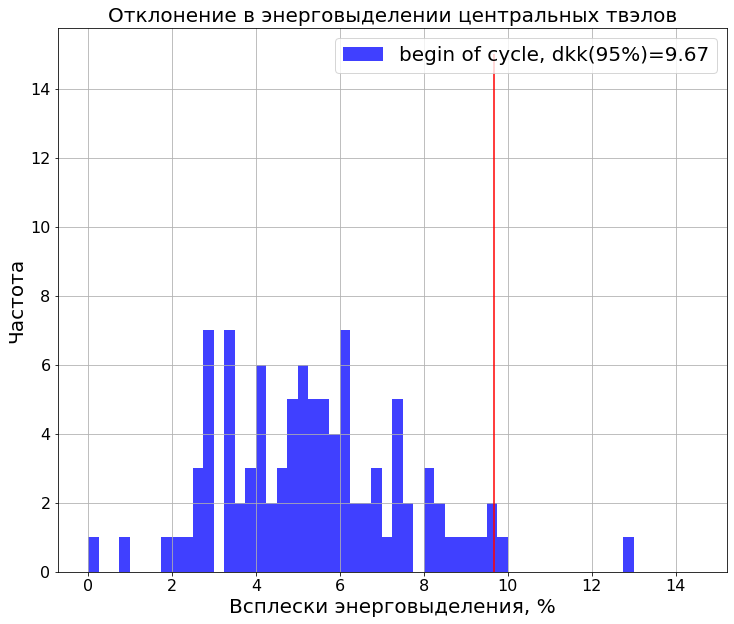

48.964777946983865


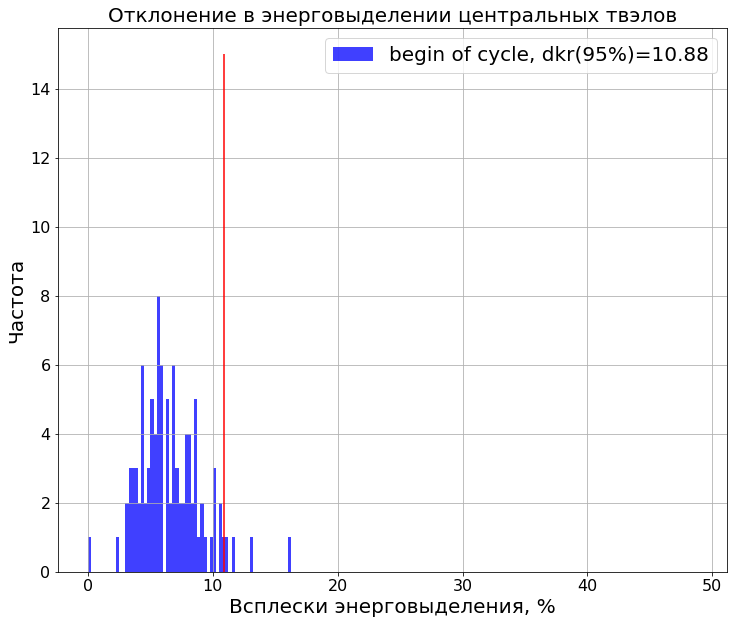

14.742366412213725


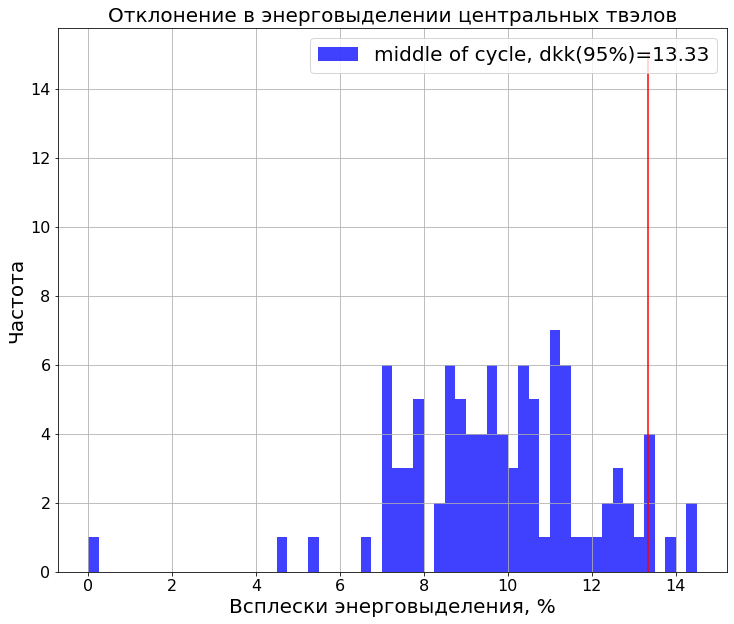

37.788403125384924


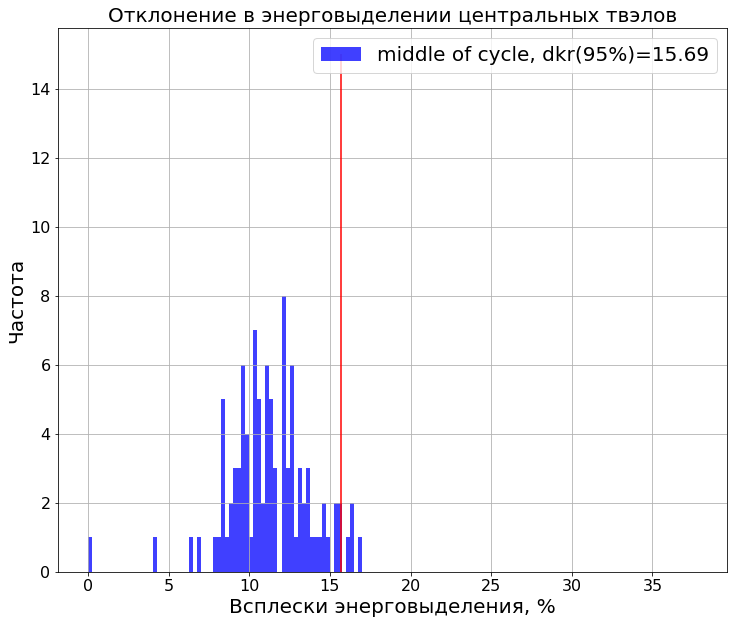

13.601377354668811


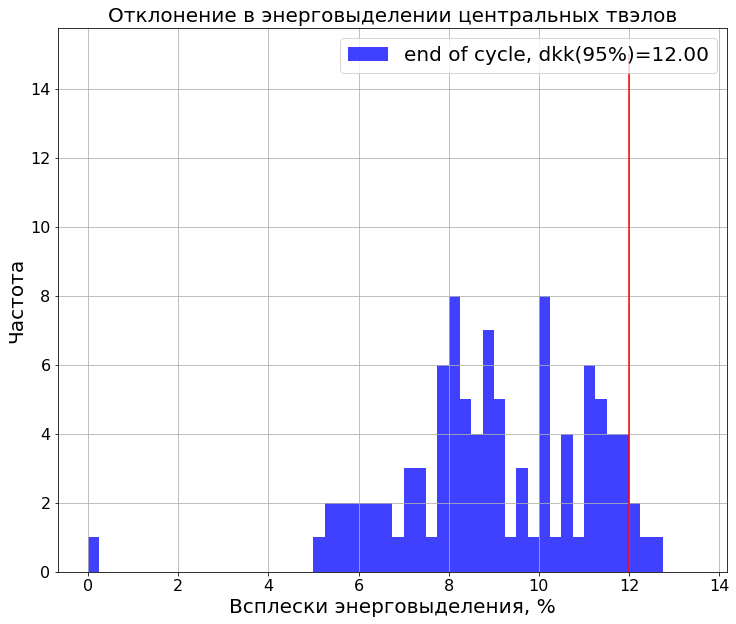

13.980749985375985


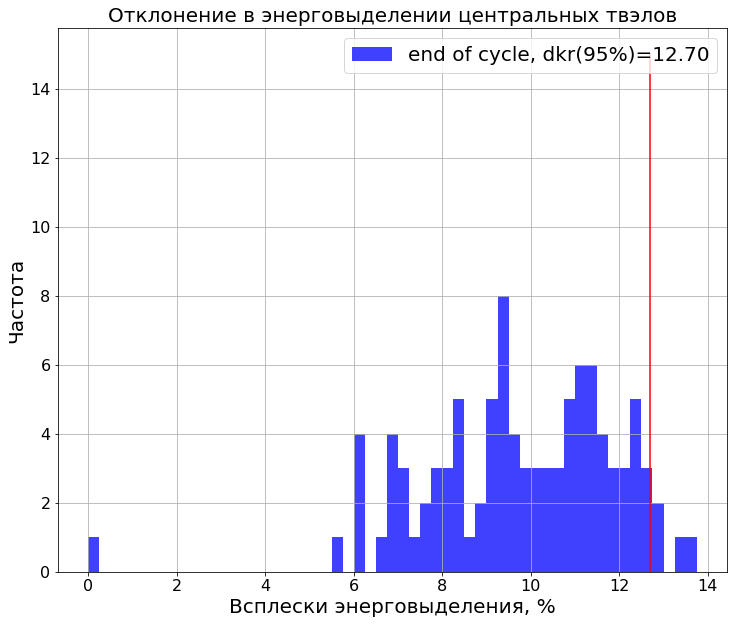

In [16]:
PlotSeries('dkk','begin of cycle', max_b_kk,_tvels)
PlotSeries('dkr','begin of cycle', max_b_kr,_tvels)
PlotSeries('dkk','middle of cycle', max_m_kk,_tvels)
PlotSeries('dkr','middle of cycle', max_m_kr,_tvels)
PlotSeries('dkk','end of cycle', max_e_kk,_tvels)
PlotSeries('dkr','end of cycle', max_e_kr,_tvels)

In [23]:
max_20_m

,tvs,tvel,time,kk,state,kq,kr
0,1,277,13,1.6800,0,0.33971,0.570713
1,1,287,13,1.3136,0,0.33971,0.446243
2,1,297,13,0.6810,0,0.33971,0.231343
3,1,307,13,0.4614,0,0.33971,0.156742
4,1,317,13,0.6331,0,0.33971,0.215070
5,1,327,13,1.2668,0,0.33971,0.430345
6,2,277,13,1.4375,0,0.56112,0.806610
7,2,287,13,1.1640,0,0.56112,0.653144
8,2,297,13,0.6546,0,0.56112,0.367309
9,2,307,13,0.5440,0,0.56112,0.305249


1.2163624000000002

In [18]:
max_20_m.sort_values('dkk').tail(1)

,tvs,tvel,time,kk,state,kq,kr,dkq,dkk,dkr
20145,98,307,13,1.1679,20,1.305,1.524109,23.931624,18.870229,47.317805
